<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1873/356835837.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


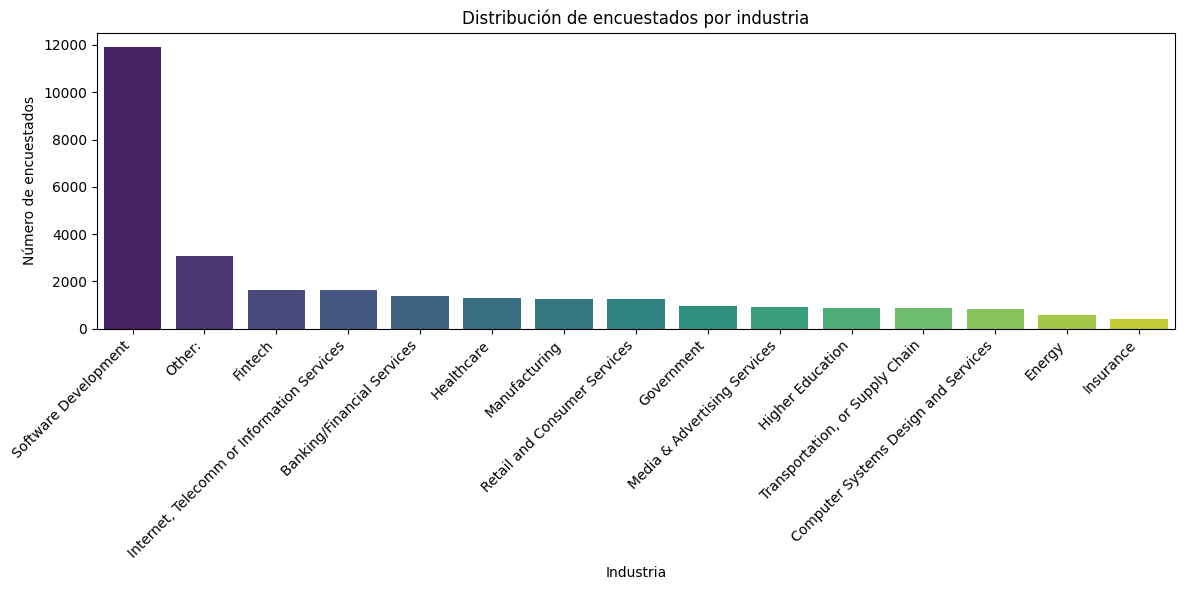

📊 Top 5 industrias con más encuestados:
Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Name: count, dtype: int64


In [3]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Verificar que la columna exista ---
if 'Industry' not in df.columns:
    raise KeyError("⚠️ La columna 'Industry' no se encuentra en el DataFrame.")

# --- 2️⃣ Contar la cantidad de encuestados por industria ---
industry_counts = df['Industry'].value_counts()

# --- 3️⃣ Gráfico de barras ---
plt.figure(figsize=(12,6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de encuestados')
plt.xlabel('Industria')
plt.title('Distribución de encuestados por industria')
plt.tight_layout()
plt.show()

# --- 4️⃣ Mostrar las 5 industrias más comunes ---
print("📊 Top 5 industrias con más encuestados:")
print(industry_counts.head())


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


📊 Estadísticas de compensación anual:
Media: $86,155.29
Mediana: $65,000.00
Desviación estándar: $186,756.97

⚠️ Número de outliers detectados: 89
Ejemplos de compensaciones extremadamente altas:
529      650000.0
828     1000000.0
1932     945000.0
2171     750000.0
2187    2000000.0
2316    1000000.0
2592     800000.0
3024    1302817.0
5934    1031099.0
6735     650000.0
Name: ConvertedCompYearly, dtype: float64


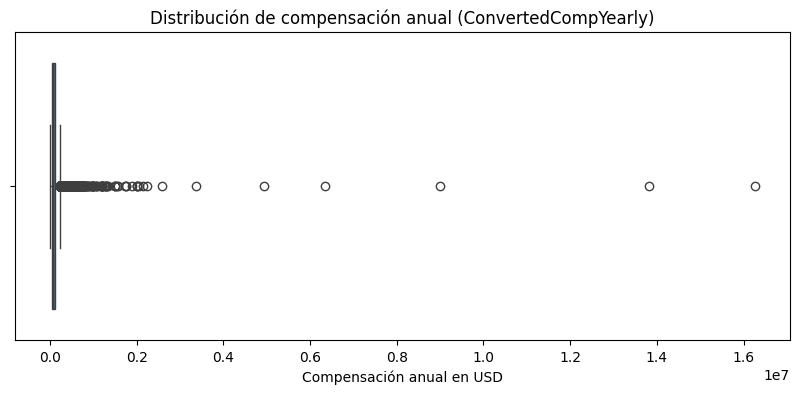

In [4]:
##Write your code here
import pandas as pd
import numpy as np

# --- 1️⃣ Verificar que la columna exista ---
if 'ConvertedCompYearly' not in df.columns:
    raise KeyError("⚠️ La columna 'ConvertedCompYearly' no se encuentra en el DataFrame.")

# --- 2️⃣ Convertir a numérico y eliminar valores nulos ---
comp_series = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

# --- 3️⃣ Estadísticas básicas ---
mean_comp = comp_series.mean()
median_comp = comp_series.median()
std_comp = comp_series.std()

print(f"📊 Estadísticas de compensación anual:")
print(f"Media: ${mean_comp:,.2f}")
print(f"Mediana: ${median_comp:,.2f}")
print(f"Desviación estándar: ${std_comp:,.2f}")

# --- 4️⃣ Identificar outliers (3 desviaciones estándar por encima de la media) ---
threshold = mean_comp + 3*std_comp
outliers = comp_series[comp_series > threshold]

print(f"\n⚠️ Número de outliers detectados: {len(outliers)}")
print(f"Ejemplos de compensaciones extremadamente altas:\n{outliers.head(10)}")

# --- 5️⃣ Opcional: visualización con boxplot ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.boxplot(x=comp_series)
plt.title('Distribución de compensación anual (ConvertedCompYearly)')
plt.xlabel('Compensación anual en USD')
plt.show()


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


📊 Límites para outliers:
Lower bound: $-80,177.25
Upper bound: $220,860.75

⚠️ Número de outliers detectados: 978
Ejemplos de outliers:
428    230000.0
456    300000.0
461    254425.0
529    650000.0
545    400000.0
570    250000.0
594    432000.0
636    300000.0
678    295662.0
703    250000.0
Name: ConvertedCompYearly, dtype: float64


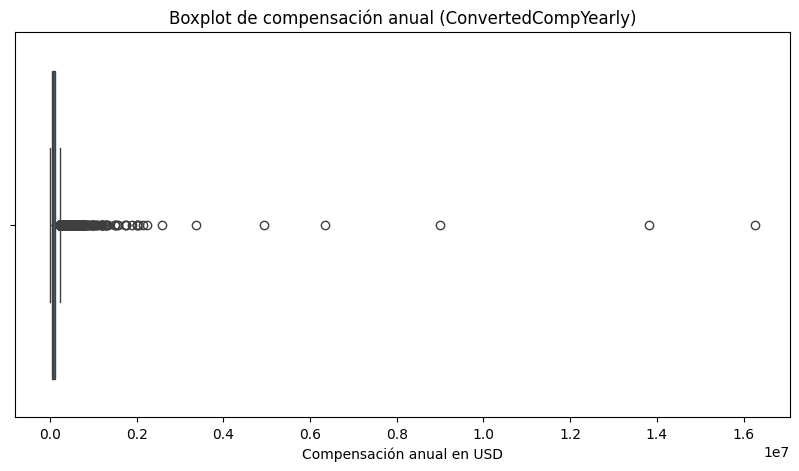

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Verificar que la columna exista ---
if 'ConvertedCompYearly' not in df.columns:
    raise KeyError("⚠️ La columna 'ConvertedCompYearly' no se encuentra en el DataFrame.")

# --- 2️⃣ Convertir a numérico y eliminar nulos ---
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

# --- 3️⃣ Calcular percentiles y IQR ---
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

# --- 4️⃣ Determinar límites para outliers ---
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"📊 Límites para outliers:")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

# --- 5️⃣ Identificar outliers ---
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]
print(f"\n⚠️ Número de outliers detectados: {len(outliers)}")
print(f"Ejemplos de outliers:\n{outliers.head(10)}")

# --- 6️⃣ Visualización con boxplot ---
plt.figure(figsize=(10,5))
sns.boxplot(x=comp)
plt.title('Boxplot de compensación anual (ConvertedCompYearly)')
plt.xlabel('Compensación anual en USD')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
import pandas as pd

# --- 1️⃣ Convertir ConvertedCompYearly a numérico y eliminar nulos temporalmente ---
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# --- 2️⃣ Calcular IQR ---
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# --- 3️⃣ Crear nuevo DataFrame excluyendo outliers ---
df_no_outliers = df[(comp >= lower_bound) & (comp <= upper_bound)].copy()

# --- 4️⃣ Validar tamaño del nuevo DataFrame ---
print(f"📊 Tamaño original del DataFrame: {df.shape}")
print(f"📊 Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")
print(f"Se eliminaron {df.shape[0] - df_no_outliers.shape[0]} filas con outliers.")


📊 Tamaño original del DataFrame: (65437, 114)
📊 Tamaño del DataFrame sin outliers: (22457, 114)
Se eliminaron 42980 filas con outliers.


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
